In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Start

In [ ]:
train_data_path = '/content/drive/MyDrive/Colab Notebooks/ABB_test/train_v9rqX0R.csv'
test_data_path = '/content/drive/MyDrive/Colab Notebooks/ABB_test/test_AbJTz2l.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(train_data_path)
df.shape

(8523, 12)

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [ ]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


* There 12 columns.
* Item_Identifier, Outlet_Identifier and Item_Outlet_Sales are not relevant in training features.
* We have 9 columns to work with.

* Categorical cols: ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
* Numerical cols: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


There are just 2 categories for fat content: low fat and regular.

In [ ]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
df['Item_Visibility'].min(), df['Item_Visibility'].mean(),  df['Item_Visibility'].max()

(0.0, np.float64(0.06613202877895108), 0.328390948)

In [ ]:
df['Item_MRP'].min(), df['Item_MRP'].mean(), df['Item_MRP'].max()

(31.29, np.float64(140.9927819781767), 266.8884)

In [ ]:
df['Outlet_Establishment_Year'].min(), df['Outlet_Establishment_Year'].max()

(1985, 2009)

In [ ]:
df['Outlet_Establishment_Year'].value_counts()

,count
Outlet_Establishment_Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


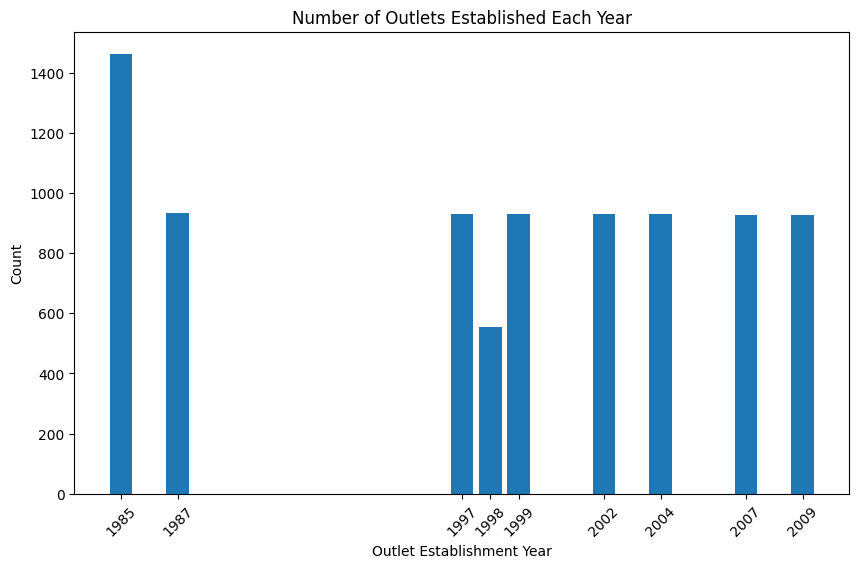

In [ ]:
year_counts = df['Outlet_Establishment_Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Count')
plt.title('Number of Outlets Established Each Year')
plt.xticks(year_counts.index, rotation=45)
plt.show()

There are some years when no establishment opened.

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
adict = {}
for ele in zip(df['Outlet_Identifier'], df['Outlet_Size']):
  adict[(ele[0], ele[1])] = 1

In [ ]:
adict

{('OUT049', 'Medium'): 1,
 ('OUT018', 'Medium'): 1,
 ('OUT010', nan): 1,
 ('OUT013', 'High'): 1,
 ('OUT027', 'Medium'): 1,
 ('OUT045', nan): 1,
 ('OUT017', nan): 1,
 ('OUT046', 'Small'): 1,
 ('OUT035', 'Small'): 1,
 ('OUT019', 'Small'): 1}

In [ ]:
# ('OUT049', 'Medium'): 1,
#  ('OUT018', 'Medium'): 1,
#  ('OUT010', nan): 1,-----------Grocery store, tier 3  (small)
#  ('OUT013', 'High'): 1,
#  ('OUT027', 'Medium'): 1,
#  ('OUT045', nan): 1,------------Supermarket 1, Tier2   (small)
#  ('OUT017', nan): 1,------------Supermarket 1, Tier2   (small)
#  ('OUT046', 'Small'): 1,
#  ('OUT035', 'Small'): 1,
#  ('OUT019', 'Small'): 1

In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


### Feature Engineering Operations

In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df['Outlet_Size'].fillna('Small', inplace=True)

<ipython-input-55-4201d7de8731>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Outlet_Size'].fillna('Small', inplace=True)


In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':'LF',
                            'Regular': 'reg',
                            'LF': 'LF',
                            'reg':'reg',
                            'low fat': 'LF'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,5517
reg,3006


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'age'],
      dtype='object')

In [ ]:
df['age'] = 2013 - df['Outlet_Establishment_Year']

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
overall_mean = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(overall_mean)

In [ ]:
df['price_per_weight'] = df['Item_MRP']/df['Item_Weight']

In [ ]:
np.percentile(df['Item_Visibility'], 0), np.percentile(df['Item_Visibility'], 40), np.percentile(df['Item_Visibility'], 80)

(np.float64(0.0), np.float64(0.0417543446), np.float64(0.1069244294))

In [ ]:
df['Item_Visibility'].max()

0.328390948

In [ ]:
df['visibility_level'] = pd.cut(df['Item_Visibility'],
                            bins=[-1, 0.0417543446, 0.1069244294, float('inf')],
                            labels=['Low', 'Medium', 'High'])

In [ ]:
# df['weigh_level'] = pd.cut(df['Item_Weight'],
#                             bins=[-1, 10, 15, float('inf')],
#                             labels=['Low', 'Medium', 'High'])

df['weigh_level'] = pd.cut(df['Item_Weight'],
                            bins=[-1, 12.5, float('inf')],
                            labels=['Low', 'High'])

In [ ]:
df['MRP_level'] = pd.cut(df['Item_MRP'],
                            bins=[-1, 100, 210, float('inf')],
                            labels=['Low', 'Medium', 'High'])

# df['MRP_level'] = pd.cut(df['Item_MRP'],
#                             bins=[-1, 70, 135, 200, float('inf')],
#                             labels=['Low', 'Medium1', 'Medium2', 'High'])

# 70, 135, 200

In [ ]:
df['MRP_level'] .value_counts()

,count
MRP_level,
Medium,4722
Low,2439
High,1362


In [ ]:
df['Item_MRP'].min(), df['Item_MRP'].max()

(31.29, 266.8884)

In [ ]:
np.percentile(df['Item_MRP'], 50)

np.float64(143.0128)

In [ ]:
df['Item_Identifier_cat'] = df['Item_Identifier'].apply(lambda ele: ele[:2])
df['Item_Identifier_cat'].value_counts()

,count
Item_Identifier_cat,
FD,6125
NC,1599
DR,799


In [ ]:
# df['Item_Type'].value_counts()

In [ ]:
perishable_items = ['Fruits and Vegetables', 'Dairy', 'Meat', 'Breads', 'Seafood', 'Breakfast']

df['is_perishable'] = df['Item_Type'].isin(perishable_items).astype(int)

In [ ]:
df['is_perishable'].value_counts()

,count
is_perishable,
0,5759
1,2764


In [ ]:
df['visibility_mrp'] = df['Item_Visibility']*df['Item_MRP']
df['log_visibility'] = np.log(df['Item_Visibility'])
df['log_visibility_mrp'] = np.log(df['visibility_mrp'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
processed_items = ['Snack Foods', 'Frozen Foods', 'Canned', 'Baking Goods', 'Soft Drinks',
                   'Breads', 'Hard Drinks', 'Starchy Foods']
df['is_processed'] = df['Item_Type'].isin(processed_items).astype(int)

In [ ]:
# df.loc[df['Outlet_Type'] == 'Supermarket Type3', 'Outlet_Type'] = 'Supermarket Type2'

In [ ]:
df['is_supermarket'] = df['Outlet_Type'].isin(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']).astype(int)

In [ ]:
def map_item_type(x):
    if x in ['Fruits and Vegetables', 'Snack Foods', 'Frozen Foods', 'Canned', 'Baking Goods', 'Meat',
            'Breads', 'Starchy Foods', 'Breakfast', 'Seafood']:
        return 'food'
    elif x in ['Dairy', 'Soft Drinks', 'Hard Drinks']:
        return 'drinks'
    elif x in ['Household', 'Health and Hygiene', 'Others']:
        return 'non_eatable'
    else:
        return 'unknown'

# Apply the mapping
df['item_type_cat'] = df['Item_Type'].apply(map_item_type)

tier_map = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
df['Outlet_Tier'] = df['Outlet_Location_Type'].map(tier_map)

In [ ]:
df['Visibility_Perishable'] = df['Item_Visibility'] * df['is_perishable']

In [ ]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
# # Mean sales per Item
# df['item_avg_sales'] = df['Item_Identifier'].map(df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean())

# # Mean sales per Outlet
# df['outlet_avg_sales'] = df['Outlet_Identifier'].map(df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean())

from sklearn.model_selection import KFold

# Create empty feature
df['item_avg_sales'] = np.nan

# 5-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df):
    train_data, val_data = df.iloc[train_idx], df.iloc[val_idx]

    # Group on training data only
    means = train_data.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()

    # Map means to validation data
    df.loc[val_idx, 'item_avg_sales'] = df.loc[val_idx, 'Item_Identifier'].map(means)

# Finally, fill remaining NaNs (if any) with global mean
df['item_avg_sales'].fillna(df['Item_Outlet_Sales'].mean(), inplace=True)


<ipython-input-32-a14684373055>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['item_avg_sales'].fillna(df['Item_Outlet_Sales'].mean(), inplace=True)


In [ ]:
# Create empty feature
df['outlet_avg_sales'] = np.nan

# 5-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df):
    train_data, val_data = df.iloc[train_idx], df.iloc[val_idx]

    # Group on training data only
    means = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()

    # Map means to validation data
    df.loc[val_idx, 'outlet_avg_sales'] = df.loc[val_idx, 'Outlet_Identifier'].map(means)

# Finally, fill remaining NaNs (if any) with global mean
df['outlet_avg_sales'].fillna(df['Item_Outlet_Sales'].mean(), inplace=True)

<ipython-input-33-2819f548a330>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['outlet_avg_sales'].fillna(df['Item_Outlet_Sales'].mean(), inplace=True)


In [ ]:
# # List of non-veg Item Types
# nonveg_items = ['Meat', 'Seafood']

# # Create if_nonveg column
# df['is_nonveg'] = df['Item_Type'].isin(nonveg_items).astype(int)


In [ ]:
# df['outlet_type_size'] = df['Outlet_Type'] + "_" + df['Outlet_Size']

In [ ]:
# df['outlet_type_size'].value_counts()

In [ ]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'age', 'price_per_weight',
       'visibility_level', 'weigh_level', 'MRP_level', 'Item_Identifier_cat',
       'is_perishable', 'visibility_mrp', 'log_visibility',
       'log_visibility_mrp', 'is_processed', 'is_supermarket', 'item_type_cat',
       'Outlet_Tier', 'Visibility_Perishable', 'item_avg_sales',
       'outlet_avg_sales'],
      dtype='object')

In [ ]:
# cat_features

In [ ]:
# num_features = set(df.columns) - set(cat_features)
# num_features

* Only Item_Weight and Outlet_Size has missing values

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'age', 'price_per_weight',
       'visibility_level', 'weigh_level', 'MRP_level', 'Item_Identifier_cat',
       'is_perishable', 'visibility_mrp', 'log_visibility',
       'log_visibility_mrp', 'is_processed', 'is_supermarket', 'item_type_cat',
       'Outlet_Tier', 'Visibility_Perishable', 'item_avg_sales',
       'outlet_avg_sales'],
      dtype='object')

In [ ]:
df['Item_Identifier'].nunique()

1559

In [ ]:
df['Outlet_Identifier'].nunique()

10

In [ ]:
df['Item_Weight'].min(),df['Item_Weight'].mean(),  df['Item_Weight'].max()

(4.555, np.float64(12.875420237117032), 21.35)

In [ ]:
import seaborn as sns

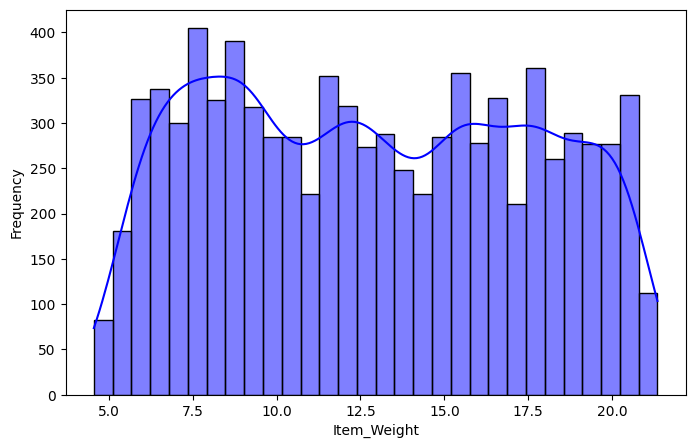

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Item_Weight'], kde=True, bins=30, color='blue')
# plt.title('Original Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Frequency')
plt.show()

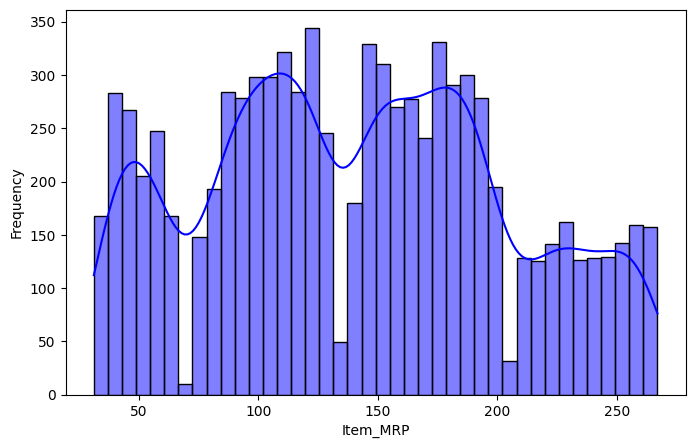

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Item_MRP'], kde=True, bins=40, color='blue')
# plt.title('Original Distribution of Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Frequency')
plt.show()

In [ ]:
counts, bin_edges = np.histogram(df['Item_MRP'], bins=40)

In [ ]:
counts

array([168, 283, 267, 205, 247, 168,  10, 148, 193, 284, 278, 298, 298,
       322, 284, 344, 246,  49, 180, 329, 310, 270, 277, 241, 331, 291,
       300, 278, 195,  32, 128, 125, 141, 162, 126, 128, 129, 142, 159,
       157])

In [ ]:
bin_edges

array([ 31.29   ,  37.17996,  43.06992,  48.95988,  54.84984,  60.7398 ,
        66.62976,  72.51972,  78.40968,  84.29964,  90.1896 ,  96.07956,
       101.96952, 107.85948, 113.74944, 119.6394 , 125.52936, 131.41932,
       137.30928, 143.19924, 149.0892 , 154.97916, 160.86912, 166.75908,
       172.64904, 178.539  , 184.42896, 190.31892, 196.20888, 202.09884,
       207.9888 , 213.87876, 219.76872, 225.65868, 231.54864, 237.4386 ,
       243.32856, 249.21852, 255.10848, 260.99844, 266.8884 ])

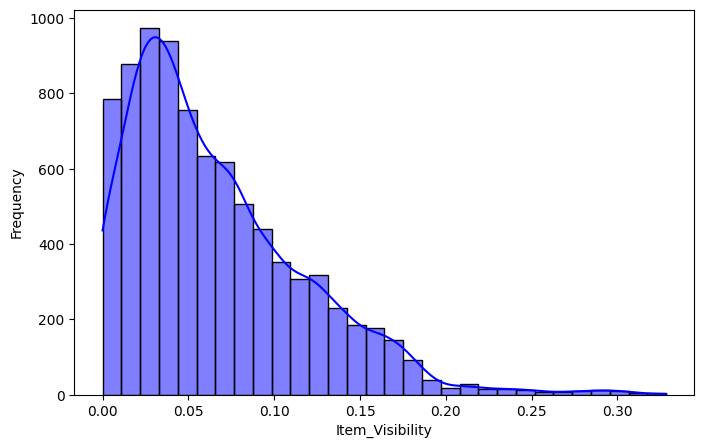

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Item_Visibility'], kde=True, bins=30, color='blue')
# plt.title('Original Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


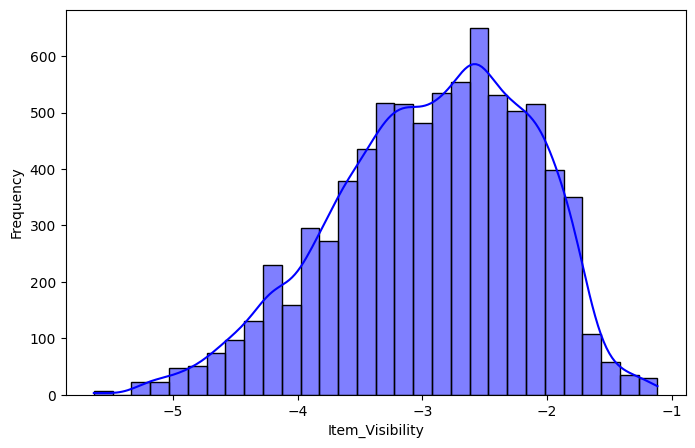

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(np.log(df['Item_Visibility']), kde=True, bins=30, color='blue')
# plt.title('Original Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['log_visibility_level'] = pd.cut(df['log_visibility'],
                            bins=[-float('inf'), -4.419374249183716, -2.688863260857491, float('inf')],
                            labels=['Low', 'Medium', 'High'])
df['log_visibility_level'].fillna('Low', inplace=True)

<ipython-input-275-a853a4e5be07>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['log_visibility_level'].fillna('Low', inplace=True)


In [ ]:
df['log_visibility_level'].isna().sum()

np.int64(0)

In [ ]:
np.percentile(df['log_visibility'], 10), np.percentile(df['log_visibility'], 60)

(np.float64(-4.419374249183716), np.float64(-2.688863260857491))

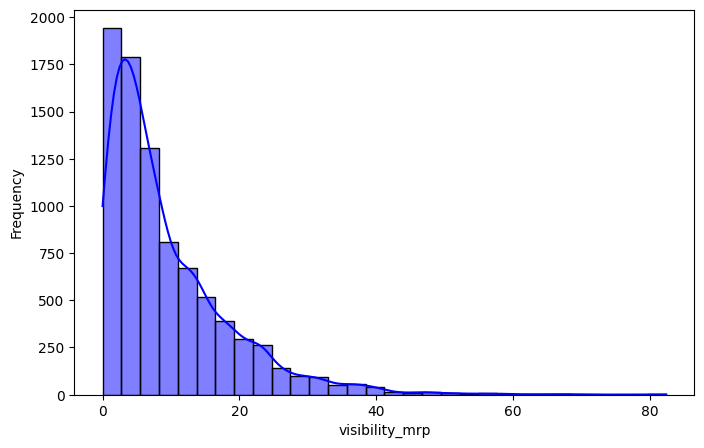

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['visibility_mrp'], kde=True, bins=30, color='blue')
# plt.title('Original Distribution of Item_Outlet_Sales')
plt.xlabel('visibility_mrp')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


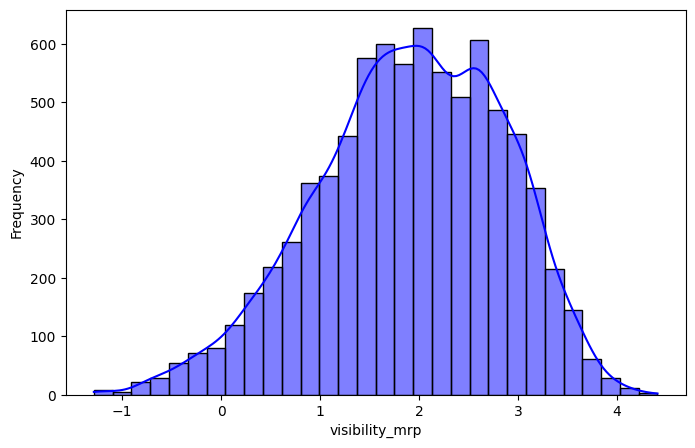

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(np.log(df['visibility_mrp']), kde=True, bins=30, color='blue')
# plt.title('Original Distribution of Item_Outlet_Sales')
plt.xlabel('visibility_mrp')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# numerical_features = set(feats) - set(cat_features)
# numerical_features

{'Item_MRP', 'Item_Weight', 'age', 'item_avg_sales', 'outlet_avg_sales'}

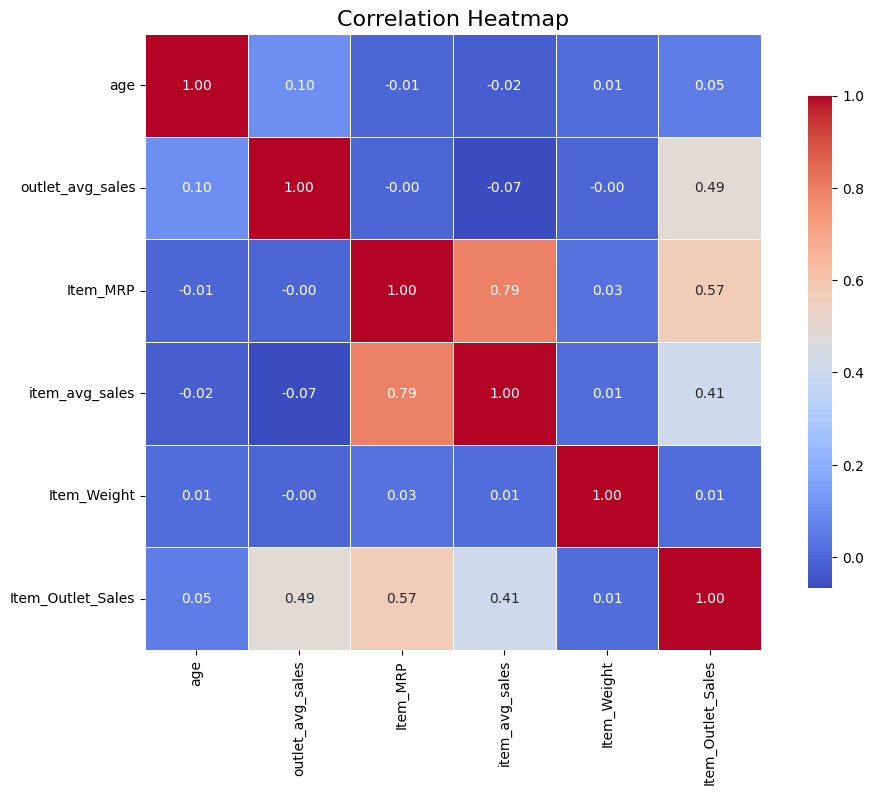

In [ ]:
corr = df[list(numerical_features) + ['Item_Outlet_Sales']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr,
            annot=True,        # show the correlation values
            fmt=".2f",          # format to 2 decimal places
            cmap='coolwarm',    # color map
            linewidths=0.5,     # lines between boxes
            square=True,        # make squares
            cbar_kws={"shrink": .8})  # color bar shrink
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
# to remove
# Item_Visibility
# log_visibility_mrp

In [ ]:
cat_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'MRP_level',
 'Item_Identifier_cat',
 'is_perishable',
 'Outlet_Identifier']

In [ ]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
# Supermarket Type2 ---- medium, tier 3
# Supermarket Type3 ---- medium, tier 3

In [ ]:
df[df['Outlet_Type'] == 'Grocery Store']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Outlet_Sales,age,price_per_weight,MRP_level,Item_Identifier_cat,is_perishable,visibility_mrp,log_visibility,log_visibility_mrp,is_processed
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,...,732.3800,15,9.484115,Medium,FD,1,0.000000,-inf,-inf,0
23,FDC37,15.500,LF,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,...,214.3876,28,6.947987,Medium,FD,0,6.198532,-2.854980,1.824312,1
28,FDE51,5.925,reg,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,...,178.4344,15,7.680776,Low,FD,1,7.348116,-1.823457,1.994444,0
29,FDC14,14.500,reg,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,...,125.8362,28,3.010028,Low,FD,0,3.152149,-2.628013,1.148085,1
30,FDV38,19.250,LF,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,...,163.7868,15,2.898473,Low,FD,1,9.504700,-1.769909,2.251786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,LF,0.035016,Hard Drinks,144.3128,OUT010,1998,Small,Tier 3,...,431.4384,15,9.817197,Medium,DR,0,5.053270,-3.351948,1.620036,1
8480,FDQ58,7.315,LF,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,...,459.4020,28,21.125632,Medium,FD,0,0.000000,-inf,-inf,1
8486,FDR20,20.000,reg,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,...,45.2744,15,2.323720,Low,FD,1,0.000000,-inf,-inf,0
8490,FDU44,12.150,reg,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,...,487.3656,28,13.362568,Medium,FD,1,16.608272,-2.279886,2.809901,0


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'age', 'price_per_weight',
       'MRP_level', 'Item_Identifier_cat', 'is_perishable', 'visibility_mrp'],
      dtype='object')

20

## Train

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'age', 'price_per_weight',
       'MRP_level', 'Item_Identifier_cat', 'is_perishable', 'visibility_mrp',
       'log_visibility', 'log_visibility_mrp', 'is_processed',
       'is_supermarket', 'item_type_cat', 'Outlet_Tier',
       'Visibility_Perishable', 'item_avg_sales_x', 'item_avg_sales_y',
       'outlet_avg_sales'],
      dtype='object')

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'age', 'price_per_weight',
       'MRP_level', 'Item_Identifier_cat', 'is_perishable', 'visibility_mrp',
       'log_visibility', 'log_visibility_mrp', 'is_processed',
       'is_supermarket', 'item_type_cat', 'Outlet_Tier',
       'Visibility_Perishable', 'item_avg_sales_x', 'item_avg_sales_y',
       'outlet_avg_sales', 'item_avg_sales', 'visibility_level',
       'log_visibility_level', 'weigh_level'],
      dtype='object')

In [ ]:
ffeats = ['Item_Weight',
'Item_Fat_Content',
'Item_Type',
'Item_MRP',
'age',
'Outlet_Size',
'Outlet_Location_Type',
'Outlet_Type',
'MRP_level',
'weigh_level',
'log_visibility_level',
'price_per_weight',
'Item_Visibility',
'log_visibility',
'Outlet_Identifier',
'Item_Identifier_cat',
'is_perishable',
'visibility_mrp',
'is_processed',
'is_supermarket',
'item_type_cat',
'log_visibility_mrp',
'Outlet_Tier',
'item_avg_sales',
'outlet_avg_sales'
]

In [ ]:
[ele for ele in ffeats]

['Item_Weight',
 'Item_Fat_Content',
 'Item_Type',
 'Item_MRP',
 'age',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'MRP_level',
 'weigh_level',
 'log_visibility_level',
 'price_per_weight',
 'Item_Visibility',
 'log_visibility',
 'Outlet_Identifier',
 'Item_Identifier_cat',
 'is_perishable',
 'visibility_mrp',
 'is_processed',
 'is_supermarket',
 'item_type_cat',
 'log_visibility_mrp',
 'Outlet_Tier',
 'item_avg_sales',
 'outlet_avg_sales']

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

feats = ['Item_Weight',
         'Item_Fat_Content',
         'Item_Type',
         'Item_MRP',
         'age',
         'Outlet_Size',
         'Outlet_Location_Type',
         'Outlet_Type',
         'MRP_level',
        #  'weigh_level',

        #  'log_visibility_level',
        #  'price_per_weight',
        #  'Item_Visibility',
          # 'log_visibility',


        #  'Outlet_Identifier',


        #  'Item_Identifier_cat',
        #  'is_perishable',
        #  'visibility_mrp',

        #  'is_processed',
        #  'is_supermarket',
        #  'item_type_cat',

        #  'log_visibility_mrp',

        #  'Outlet_Tier',
        #  'item_avg_sales',
        #  'outlet_avg_sales'
         ]
len(feats)

# Features and target
X = df[feats]
y = df['Item_Outlet_Sales']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X
# y_train = y

In [ ]:
# ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# 'outlet_type_size' not good

# Identify categorical columns (by column names or indices)
cat_features = ['Item_Fat_Content',
                'Item_Type',
                'Outlet_Size',
                'Outlet_Location_Type',
                'Outlet_Type',
                # 'Outlet_Identifier',
                'MRP_level',
                # 'weigh_level',
                # 'log_visibility_level',
                # 'Outlet_Tier',
                # 'Item_Identifier_cat',
                # 'is_perishable',
                # 'is_processed', 'is_supermarket',
                # 'item_type_cat',
                ]


# Model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=5,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)
# # Best Parameters: {'depth': 4, 'learning_rate': 0.1, 'iterations': 500}
# model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))

In [ ]:
# Train
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))
# model.fit(X_train, y_train, cat_features=cat_features)

0:	learn: 1671.9999234	test: 1604.2710546	best: 1604.2710546 (0)	total: 42.9ms	remaining: 42.8s
100:	learn: 1080.9690718	test: 1016.9758455	best: 1016.9479318 (97)	total: 1.03s	remaining: 9.13s
200:	learn: 1066.0766935	test: 1015.1318727	best: 1014.4484178 (191)	total: 1.71s	remaining: 6.81s
300:	learn: 1051.1379829	test: 1015.8133622	best: 1013.9512487 (232)	total: 2.37s	remaining: 5.51s
400:	learn: 1039.8404982	test: 1016.7367447	best: 1013.9512487 (232)	total: 3.07s	remaining: 4.58s
500:	learn: 1028.4480998	test: 1017.1545511	best: 1013.9512487 (232)	total: 3.74s	remaining: 3.73s
600:	learn: 1016.8459902	test: 1019.1428717	best: 1013.9512487 (232)	total: 4.45s	remaining: 2.95s
700:	learn: 1004.3069615	test: 1020.8279154	best: 1013.9512487 (232)	total: 6.09s	remaining: 2.6s
800:	learn: 994.6639870	test: 1021.0440134	best: 1013.9512487 (232)	total: 7.88s	remaining: 1.96s
900:	learn: 985.4626235	test: 1022.1232096	best: 1013.9512487 (232)	total: 9.35s	remaining: 1.03s
999:	learn: 975.3

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1028097.1307


In [ ]:
from catboost import CatBoostRegressor, Pool

# Define parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [500, 1000, 1500],
    # 'l2_leaf_reg': [1, 3, 5, 7],
}

# Initialize model
model = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

# Fit with grid search
result = model.grid_search(
    param_grid,
    X=Pool(X_train, y_train, cat_features=cat_features),
    cv=3,  # 3-fold cross-validation
    partition_random_seed=42,
    shuffle=True
)


0:	learn: 2738.3716915	test: 2788.5518538	best: 2788.5518538 (0)	total: 7.49ms	remaining: 3.74s
100:	learn: 1455.4114854	test: 1500.2684792	best: 1500.2684792 (100)	total: 451ms	remaining: 1.78s
200:	learn: 1149.8725601	test: 1180.8721843	best: 1180.8721843 (200)	total: 945ms	remaining: 1.41s
300:	learn: 1091.7338200	test: 1115.6845871	best: 1115.6845871 (300)	total: 1.47s	remaining: 974ms
400:	learn: 1078.6759522	test: 1100.5279374	best: 1100.5279374 (400)	total: 2.38s	remaining: 589ms
499:	learn: 1073.6803600	test: 1095.6369874	best: 1095.6369874 (499)	total: 3.39s	remaining: 0us

bestTest = 1095.636987
bestIteration = 499

0:	loss: 1095.6369874	best: 1095.6369874 (0)	total: 3.42s	remaining: 1m 28s
0:	learn: 2654.7534636	test: 2706.3204679	best: 2706.3204679 (0)	total: 12.6ms	remaining: 6.29s
100:	learn: 1071.5341853	test: 1093.3209484	best: 1093.3209484 (100)	total: 926ms	remaining: 3.66s
200:	learn: 1059.5567617	test: 1088.7743493	best: 1088.7743493 (200)	total: 1.83s	remaining: 2.

In [ ]:
print("Best Parameters:", result['params'])

Best Parameters: {'depth': 4, 'learning_rate': 0.1, 'iterations': 500}


In [ ]:
# # perf
# Mean Squared Error: 1035425.7889
# Mean Squared Error: 1034132.5728  (after grouping fat content)
# Mean Squared Error: 1038030.5063  (after grouping fat content, adding age)
# Mean Squared Error: 1035907.9979  (after grouping fat content, adding age, price_per_weight)
# Mean Squared Error: 1037155.2055  (after grouping fat content, adding age, price_per_weight, fill na weight)

## Test

In [ ]:
test_data_path = '/content/drive/MyDrive/Colab Notebooks/ABB_test/test_AbJTz2l.csv'
test_df = pd.read_csv(test_data_path)
test_df.shape

(5681, 11)

### Operations

In [ ]:
# Step 1: Compute group means
train_means = df.groupby('Item_Identifier')['Item_Weight'].mean()
test_means = test_df.groupby('Item_Identifier')['Item_Weight'].mean()

# Step 2: Fill using train means first
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Identifier'].map(train_means))

# Step 3: Fill using test means if train mean wasn't available
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Identifier'].map(test_means))

# Step 4: Fill any remaining NaNs with overall mean (from train)
overall_mean = df['Item_Weight'].mean()
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(overall_mean)


########################
test_df['Outlet_Size'].fillna('Small', inplace=True)
###########################
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].map({'Low Fat':'LF',
                            'Regular': 'reg',
                            'LF': 'LF',
                            'reg':'reg',
                            'low fat': 'LF'})
test_df['Item_Fat_Content'].value_counts()
#################################
test_df['age'] = 2013 - test_df['Outlet_Establishment_Year']
test_df['price_per_weight'] = test_df['Item_MRP']/df['Item_Weight']
#####################################
test_df['MRP_level'] = pd.cut(test_df['Item_MRP'],
                            bins=[-1, 100, 210, float('inf')],
                            labels=['Low', 'Medium', 'High'])
# test_df['MRP_level'] = pd.cut(test_df['Item_MRP'],
#                             bins=[-1, 70, 135, 200, float('inf')],
#                             labels=['Low', 'Medium1', 'Medium2', 'High'])
######################################
test_df['weigh_level'] = pd.cut(test_df['Item_Weight'],
                            bins=[-1, 12.5, float('inf')],
                            labels=['Low', 'High'])
#################################################
test_df['Item_Identifier_cat'] = test_df['Item_Identifier'].apply(lambda ele: ele[:2])
test_df['Item_Identifier_cat'].value_counts()
##########################################
test_df['is_perishable'] = test_df['Item_Type'].isin(perishable_items).astype(int)
test_df['is_perishable'].value_counts()
##################################################
test_df['visibility_mrp'] = test_df['Item_Visibility']*test_df['Item_MRP']
test_df['outlet_type_size'] = test_df['Outlet_Type'] + "_" + test_df['Outlet_Size']
test_df['log_visibility'] = np.log(test_df['Item_Visibility'])
test_df['log_visibility_mrp'] = np.log(test_df['visibility_mrp'])
###########################################
test_df['is_processed'] = test_df['Item_Type'].isin(processed_items).astype(int)
##############################################
# test_df.loc[test_df['Outlet_Type'] == 'Supermarket Type3', 'Outlet_Type'] = 'Supermarket Type2'
#####################################
test_df['is_supermarket'] = test_df['Outlet_Type'].isin(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']).astype(int)
##############################
test_df['item_type_cat'] = test_df['Item_Type'].apply(map_item_type)
#######################################
test_df['Outlet_Tier'] = test_df['Outlet_Location_Type'].map(tier_map)
#####################################
test_df['Visibility_Perishable'] = test_df['Item_Visibility'] * test_df['is_perishable']
####################################
test_df['visibility_level'] = pd.cut(test_df['Item_Visibility'],
                            bins=[-1, 0.0417543446, 0.1069244294, float('inf')],
                            labels=['Low', 'Medium', 'High'])
#####################################################
# After creating item_avg_sales on train:
# (this 'means' must be created on full training data)

means = df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()
test_df['item_avg_sales'] = test_df['Item_Identifier'].map(means)

global_mean = df['Item_Outlet_Sales'].mean()

test_df['item_avg_sales'].fillna(global_mean, inplace=True)


means = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
test_df['outlet_avg_sales'] = test_df['Outlet_Identifier'].map(means)

global_mean = df['Item_Outlet_Sales'].mean()

test_df['outlet_avg_sales'].fillna(global_mean, inplace=True)


<ipython-input-153-1facbb84b3ed>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Outlet_Size'].fillna('Small', inplace=True)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-153-1facbb84b3ed>:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace met

In [ ]:
sample_submission_path = '/content/drive/MyDrive/Colab Notebooks/ABB_test/sample_submission_8RXa3c6.csv'
sub = pd.read_csv(sample_submission_path)

X_test_f = test_df[feats]
y_pred = model.predict(X_test_f)
final_sub = test_df[['Item_Identifier',	'Outlet_Identifier']]
final_sub.head(2)
final_sub['Item_Outlet_Sales'] = y_pred

<ipython-input-154-f97809e4678d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sub['Item_Outlet_Sales'] = y_pred


In [ ]:
final_sub['Item_Outlet_Sales'].min(), final_sub['Item_Outlet_Sales'].max()

(-21.70925858865121, 6441.428026023265)

In [ ]:
final_sub.loc[final_sub['Item_Outlet_Sales'] < 0, 'Item_Outlet_Sales'] = 0.1
final_sub.to_csv('submission.csv', index=False)

In [ ]:
for ele in feats:
  print(ele)

Item_Weight
Item_Fat_Content
Item_Type
Item_MRP
age
Outlet_Size
Outlet_Location_Type
Outlet_Type
MRP_level
weigh_level
outlet_avg_sales
